In [1]:
from pyro.optim import Adam
from pyro.infer import SVI, Trace_ELBO
import pyro
import torch
import VAE
import ConvEncoderDecoder as CED
import LinearEncoderDecoder as LED
import dataloader
import torch.nn as nn
from pyro.contrib.examples.util import MNIST
import torchvision.transforms as transforms
import torchvision.datasets as dset
import matplotlib.pyplot as plt
import numpy as np
import VAE2

In [2]:
USE_CUDA = False
NUM_EPOCHS = 20
TEST_FREQUENCY = 5
train_loader, test_loader = dataloader.setup_data_loaders(batch_size=256, use_cuda=USE_CUDA)

# clear param store
pyro.clear_param_store()

model = VAE2.VAE(LED.LinearEncoder(2, 400, 100), LED.LinearDecoder(2, 400, 100), 0.1)
#model = VAE2.VAE(CED.ConvEncoder(2, 200), CED.ConvDecoder(2, 200))

optimizer = pyro.optim.Adam({'lr': 0.001})

svi = SVI(model.model, model.guide, optimizer, loss=Trace_ELBO())

train_elbo = []
test_elbo = []
# training loop
for epoch in range(NUM_EPOCHS):
    total_epoch_loss_train = dataloader.train(svi, train_loader, use_cuda=USE_CUDA)
    train_elbo.append(-total_epoch_loss_train)
    print("[epoch %03d]  average training loss: %.4f" % (epoch, total_epoch_loss_train))

    if epoch % TEST_FREQUENCY == 0:
        # report test diagnostics
        total_epoch_loss_test = dataloader.evaluate(svi, test_loader, use_cuda=USE_CUDA)
        test_elbo.append(-total_epoch_loss_test)
        print("[epoch %03d] average test loss: %.4f" % (epoch, total_epoch_loss_test))

[epoch 000]  average training loss: 1485.3728
[epoch 000] average test loss: 896.0584


KeyboardInterrupt: 

In [1]:
from TrainedVAE import TrainedLinearVAE
from TrainedVAE import TrainedConvVAE
import torch
import numpy
import matplotlib.pyplot as plt

tensor(5)


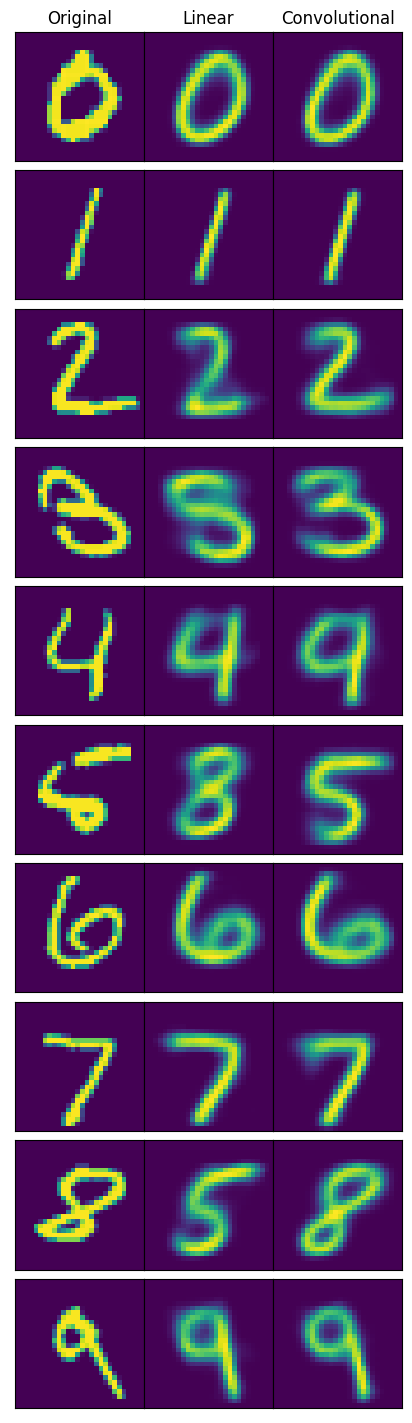

In [50]:
ttest = nn.MaxPool2d(1)

import TrainedVAE
train_loader, test_loader = dataloader.setup_data_loaders(batch_size=100, use_cuda=False)
inputs, classes = next(iter(test_loader)) 
z_mean, z_scale = TrainedVAE.TrainedLinearVAE.encoder(inputs)
z_mean2, z_scale2 = TrainedVAE.TrainedConvVAE.encoder(inputs)
k = 45
s = TrainedVAE.TrainedLinearVAE.decoder(z_mean).detach().view(-1, 28, 28)
s2 = TrainedVAE.TrainedConvVAE.decoder(z_mean2).detach().view(-1, 28, 28)
print(classes[k])

numlin = s[[3, 2, 1, 18, 4, 8, 11, 0, 61, 7]]
numconv = s2[[3, 2, 1, 18, 4, 8, 11, 0, 61, 7]]
numinput = inputs[[3, 2, 1, 18, 4, 8, 11, 0, 61, 7]].view(-1, 28, 28)

fig, ax = plt.subplots(10, 3, figsize=(5, 18))

for idx, a in enumerate(ax):
    if(idx == 0):
        a[0].set_title("Original")
        a[1].set_title("Linear")
        a[2].set_title("Convolutional")
    a[0].imshow(numinput[idx])
    a[0].get_xaxis().set_visible(False)
    a[0].get_yaxis().set_visible(False)
    a[0].set_aspect('equal')
    a[1].imshow(numlin[idx])
    a[1].get_xaxis().set_visible(False)
    a[1].get_yaxis().set_visible(False)
    a[2].imshow(numconv[idx])
    a[1].set_aspect('equal')
    a[2].get_xaxis().set_visible(False)
    a[2].get_yaxis().set_visible(False)
    a[2].set_aspect('equal')
plt.subplots_adjust(wspace=0, hspace=0)

In [14]:
import seaborn as sns
import TrainedVAE
train_loader, test_loader = dataloader.setup_data_loaders(batch_size=60000, use_cuda=False)
inputs, classes = next(iter(test_loader))
inputs2, classes2 = next(iter(train_loader))
X = torch.cat([inputs, inputs2], dim=0)


In [44]:
torch.ones(784)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [39]:
Z = torch.distributions.Normal(0, 1).sample((10,2))
params = TrainedVAE.TrainedLinearVAE.decoder(Z)
test = pyro.distributions.Bernoulli(params[0], validate_args=False)
params[0]

tensor([1.8334e-12, 4.8111e-12, 2.6050e-12, 3.5113e-12, 2.5476e-12, 3.1858e-12,
        3.3357e-12, 2.8361e-12, 4.5449e-12, 4.6135e-12, 2.2088e-12, 4.5153e-12,
        3.1104e-24, 3.0282e-25, 2.2097e-28, 2.0234e-12, 1.9988e-12, 2.4098e-12,
        3.3466e-12, 2.8749e-12, 3.3982e-12, 4.0472e-12, 3.2195e-12, 3.3036e-12,
        2.9661e-12, 3.1211e-12, 3.0203e-12, 3.4533e-12, 2.4212e-12, 2.6193e-12,
        1.7690e-12, 2.5926e-12, 7.2517e-12, 3.5207e-12, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 8.1194e-16, 2.3435e-13, 2.3087e-06, 2.5959e-06, 6.1074e-09,
        6.0325e-07, 3.0406e-06, 2.0217e-06, 1.2818e-07, 1.5408e-09, 2.4951e-25,
        2.3097e-25, 2.4424e-25, 0.0000e+00, 8.1511e-38, 3.3969e-12, 2.0554e-12,
        4.5515e-12, 2.2046e-12, 2.3971e-12, 2.9758e-12, 0.0000e+00, 0.0000e+00,
        2.2939e-27, 9.2267e-10, 9.5946e-09, 1.9254e-07, 7.6907e-08, 3.0493e-04,
        1.8849e-04, 1.2436e-03, 2.9658e-03, 4.6119e-03, 4.3176e-03, 3.7086e-03,
        3.9800e-03, 4.5771e-03, 2.9976e-

Text(0.5, 1.0, 'Convolutional Variational Autoencoder')

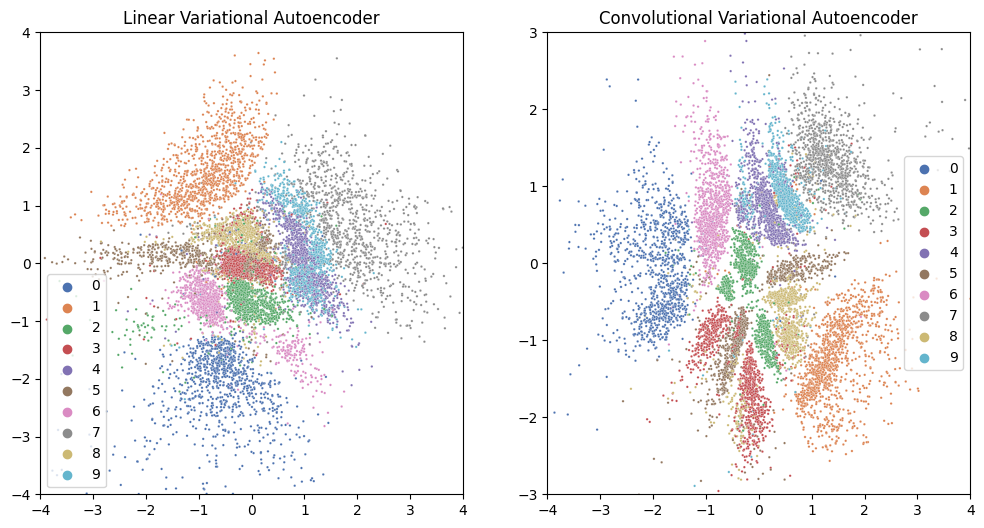

In [4]:
z_mean, z_scale = TrainedVAE.TrainedLinearVAE.encoder(inputs)
z_mean2, z_scale2 = TrainedVAE.TrainedConvVAE.encoder(inputs)
c = classes.numpy()
z = z_mean.detach().numpy()
z2 = z_mean2.detach().numpy()
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x=z[:,0],y=z[:,1], ax = ax[0], hue=c, palette="deep", s = 3)
ax[0].set_xlim([-4,4])
ax[0].set_ylim([-4,4])
sns.scatterplot(x=z2[:,0],y=z2[:,1], ax = ax[1], hue=c, palette="deep", s = 3)
ax[1].set_xlim([-4,4])
ax[1].set_ylim([-3, 3])
ax[0].set_title("Linear Variational Autoencoder")
ax[1].set_title("Convolutional Variational Autoencoder")

In [ ]:
import pyro.contrib.gp as gp

X = torch.tensor([-1.0, -0.5, 0.0, 0.5, 1.0])
y = torch.sin(20 * X) + 2 * torch.cos(14 * X) - 2 * torch.sin(6 * X)

In [ ]:
pyro.clear_param_store()
kernel = gp.kernels.RBF(input_dim=1)
kernel.variance = pyro.nn.PyroSample(pyro.distributions.LogNormal(torch.tensor(-1.0), torch.tensor(1.0)))
kernel.lengthscale = pyro.nn.PyroSample(pyro.distributions.LogNormal(torch.tensor(0.0), torch.tensor(2)))
gpmodel = gp.models.GPRegression(X, y, kernel=kernel)

hmc_kernel = pyro.infer.HMC(gpmodel.model)
mcmc = pyro.infer.MCMC(hmc_kernel, num_samples=500)
mcmc.run()

Sample: 100%|██████████| 1000/1000 [00:52, 19.10it/s, step size=5.90e-01, acc. prob=0.891]


In [63]:
from TrainedDiffusion import DModel

test = DModel.sample_image()

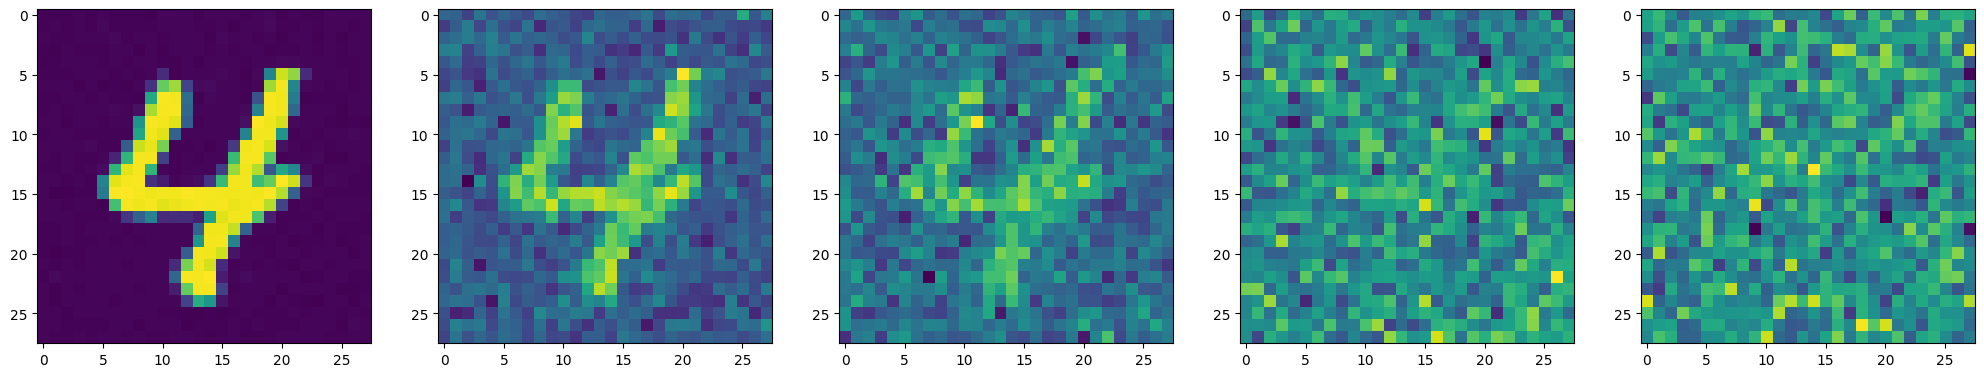

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(25,5))

ax[0].imshow(test[0].view(28, 28))
ax[1].imshow(test[50].view(28, 28))
ax[2].imshow(test[100].view(28, 28))
ax[3].imshow(test[500].view(28, 28))
ax[4].imshow(test[1000].view(28, 28))